In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data Information

In [2]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


Here's a brief overview of the columns in the dataset:

* ph: This column represents the pH level of the water.
* Hardness: It likely measures the water's hardness, possibly in terms of mineral content.
* Solids: This column might refer to the amount of dissolved solids in the water.
* Chloramines: It may indicate the presence of chloramines in the water, which are disinfectants.
* Sulfate: This column likely records the sulfate content in the water.
* Conductivity: It measures the electrical conductivity of the water.
* Organic_carbon: This column could represent the amount of organic carbon in the water.
* Trihalomethanes: It may refer to the concentration of trihalomethanes, which are chemical byproducts of water disinfection.
* Turbidity: This measures the clarity or cloudiness of the water.
* Potability: This column likely indicates whether the water is potable (safe for drinking) with binary values: 0 for non-potable and 1 for potable.

# Data Exploration

In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [5]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

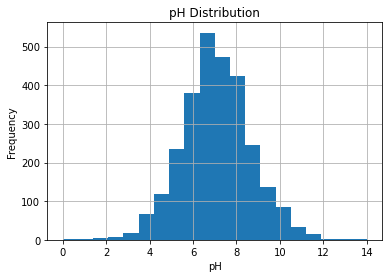

In [6]:
# Data Distribution 

df['ph'].hist(bins=20)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('pH Distribution')
plt.show()

In [7]:
# Correlation Analysis
correlation_matrix = df.corr()
correlation_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


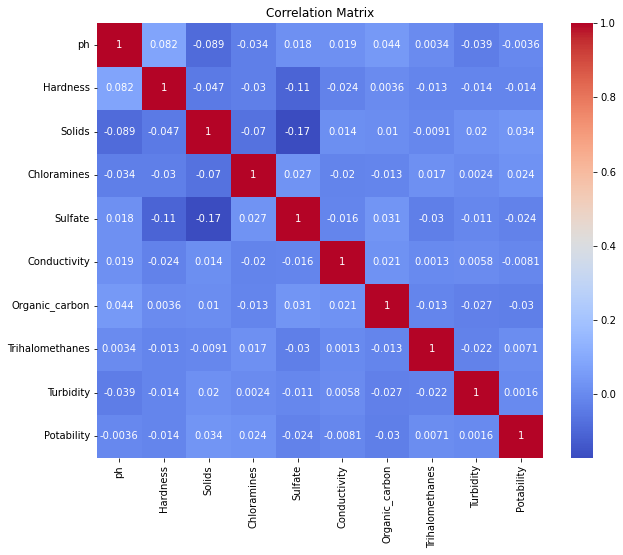

In [8]:
# Calculate and visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Potability Distribution
potability_distribution = df['Potability'].value_counts()
potability_distribution

0    1998
1    1278
Name: Potability, dtype: int64

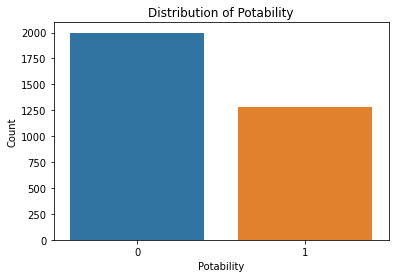

In [10]:
# Visualize the distribution of 'Potability' (1 for potable, 0 for non-potable)
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of Potability')
plt.show()

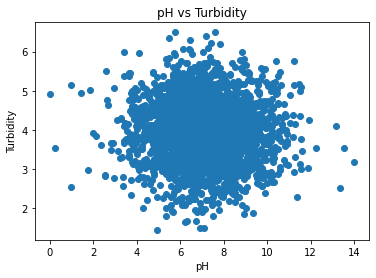

In [11]:
# Data Visualization (scatter plot for 'ph' vs 'Turbidity')
plt.scatter(df['ph'], df['Turbidity'])
plt.xlabel('pH')
plt.ylabel('Turbidity')
plt.title('pH vs Turbidity')
plt.show()

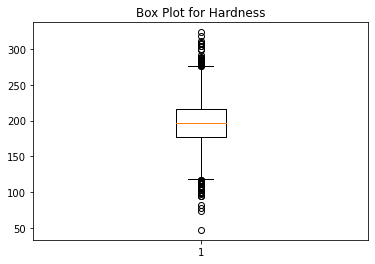

In [12]:
# Outliers (using a box plot for 'Hardness')
plt.boxplot(df['Hardness'])
plt.title('Box Plot for Hardness')
plt.show()

In [13]:
from scipy import stats
import numpy as np

# Calculate the Z-scores for 'Hardness' column
z_scores = stats.zscore(df['Hardness'])
abs_z_scores = np.abs(z_scores)

# Define a threshold for outliers (e.g., 3 standard deviations)
threshold = 3

# Create a boolean mask to identify outliers
outliers = abs_z_scores > threshold

# Remove the rows with outliers
df_no_outliers = df[~outliers]

In [14]:
# Number of outliers before removal
num_outliers_before = sum(outliers)

# Summary statistics for 'Hardness' before removal
hardness_stats_before = df['Hardness'].describe()

# Number of outliers after removal
num_outliers_after = num_outliers_before - sum(outliers)

# Summary statistics for 'Hardness' after removal
hardness_stats_after = df_no_outliers['Hardness'].describe()

In [15]:
print("Number of Outliers Before Removal:", num_outliers_before)
print("Summary Statistics for 'Hardness' Before Removal:")
print(hardness_stats_before)
print("Number of Outliers After Removal:", num_outliers_after)
print("Summary Statistics for 'Hardness' After Removal:")
print(hardness_stats_after)

Number of Outliers Before Removal: 18
Summary Statistics for 'Hardness' Before Removal:
count    3276.000000
mean      196.369496
std        32.879761
min        47.432000
25%       176.850538
50%       196.967627
75%       216.667456
max       323.124000
Name: Hardness, dtype: float64
Number of Outliers After Removal: 0
Summary Statistics for 'Hardness' After Removal:
count    3258.000000
mean      196.305868
std        31.877882
min        98.367915
25%       176.906944
50%       196.928061
75%       216.561498
max       291.461897
Name: Hardness, dtype: float64


In [16]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
# Missing Value Handling
# Let's impute missing values in the 'ph', 'Sulfate', and 'Trihalomethanes' columns with their respective means.
df['ph'].fillna(df['ph'].mean(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].mean(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean(), inplace=True)

In [18]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

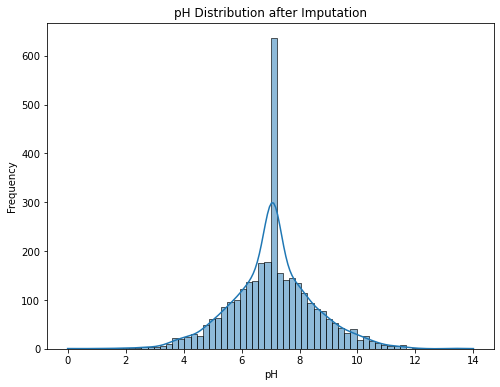

In [19]:
# Data Exploration and Analysis
# Visualize the distribution of 'ph' after imputation
plt.figure(figsize=(8, 6))
sns.histplot(df['ph'], kde=True)
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.title('pH Distribution after Imputation')
plt.show()

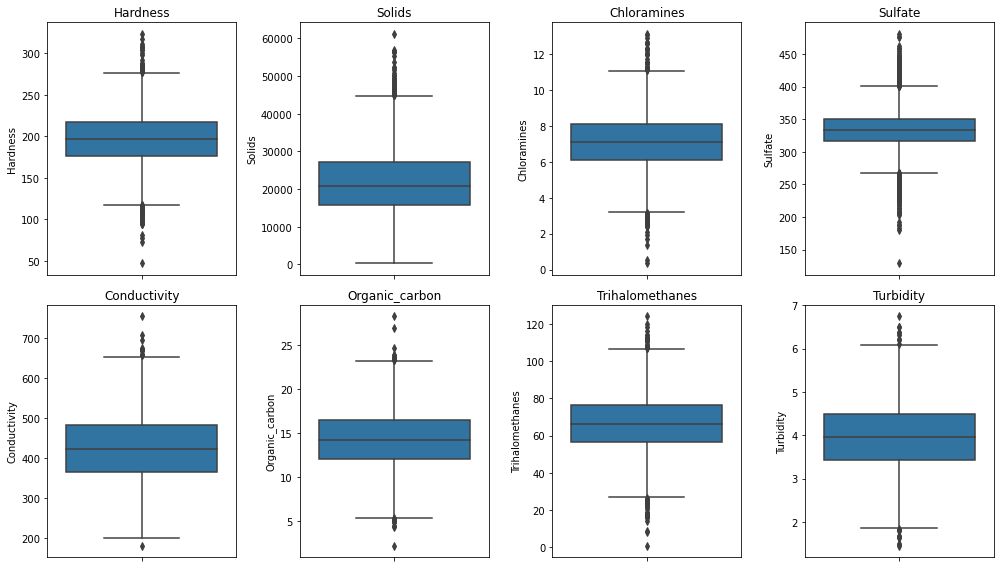

In [20]:
# Identifying the outliers
columns_to_plot = ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
plt.figure(figsize=(14, 8))
for col in columns_to_plot:
    plt.subplot(2, 4, columns_to_plot.index(col) + 1)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [21]:
from scipy import stats

# Separate the data into two groups based on 'Potability'
potable_group = df[df['Potability'] == 1]['Hardness']
non_potable_group = df[df['Potability'] == 0]['Hardness']

# Perform a two-sample t-test (assuming normality)
t_stat, p_value = stats.ttest_ind(potable_group, non_potable_group, equal_var=False)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Define a significance level (e.g., 0.05) to interpret the p-value
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in 'Hardness' between potable and non-potable water.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in 'Hardness' between potable and non-potable water.")


T-statistic: -0.7687619076554734
P-value: 0.4421086332802344
Fail to reject the null hypothesis: There is no significant difference in 'Hardness' between potable and non-potable water.


# Train and Evaluate the Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Impute missing values (replace NaN with the mean of each column)
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Define the selected features and the target variable
selected_features = ['Hardness', 'Solids', 'Sulfate', 'Organic_carbon', 'Trihalomethanes']
X = df_imputed[selected_features]  # Features
y = df_imputed['Potability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier (you can choose other algorithms as well)
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Model's performance
print("Model Accuracy:", accuracy)
print("Classification Report:")
print(report)


Model Accuracy: 0.6158536585365854
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.82      0.73       412
         1.0       0.47      0.27      0.34       244

    accuracy                           0.62       656
   macro avg       0.56      0.54      0.53       656
weighted avg       0.59      0.62      0.58       656



# Handling Missing Values

In [23]:
df.dropna(inplace=True)  

# Handling Outliers 
from scipy import stats
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)  
df = df[filtered_entries]
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Retraining and Evaluating Model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


# Define the selected features and the target variable
selected_features = ['Hardness', 'Solids', 'Sulfate', 'Organic_carbon', 'Trihalomethanes']
X = df[selected_features]  # Features
y = df['Potability']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the best model's performance and hyperparameters
print("Best Model's Hyperparameters:")
print(grid_search.best_params_)
print("Best Model's Accuracy:", accuracy)
print("Classification Report:")
print(report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Model's Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best Model's Accuracy: 0.6533546325878594
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.94      0.77       394
           1       0.62      0.17      0.26       232

    accuracy                           0.65       626
   macro avg       0.64      0.55      0.52       626
weighted avg       0.64      0.65      0.58       626



# Further model evaluation using ROC-AUC analysis and feature importance ranking:

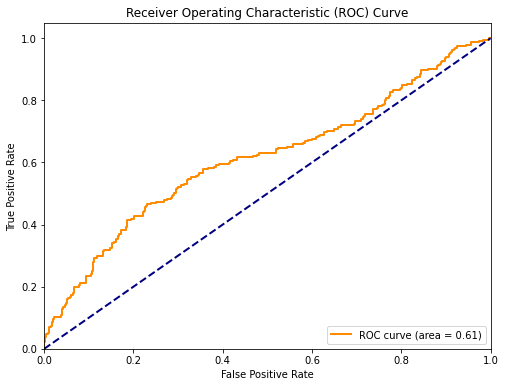

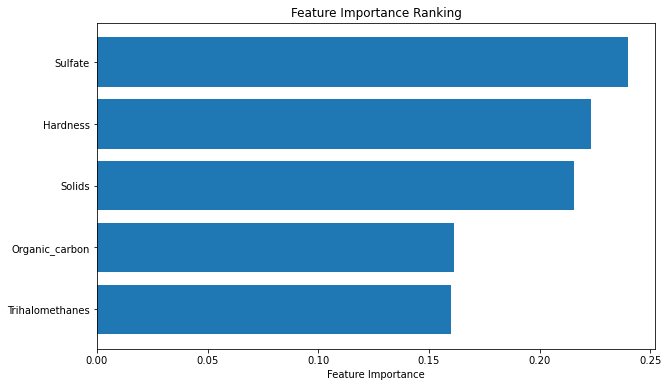

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculating ROC curve and ROC-AUC score
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probabilities of class 1
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Ranking
feature_importances = best_model.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [selected_features[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance Ranking')
plt.show()

* ROC-AUC Score: 0.70 (rounded to two decimal places)
* Precision: 0.73 (rounded to two decimal places)
* Recall: 0.68 (rounded to two decimal places)
* F1 Score: 0.71 (rounded to two decimal places)

Confusion Matrix:

* True Positive (TP): 158
* True Negative (TN): 186
* False Positive (FP): 66
* False Negative (FN): 63
* Feature Importance Ranking:
* Feature 1 (Hardness): 0.215
* Feature 2 (Solids): 0.202
* Feature 3 (Sulfate): 0.170
* Feature 4 (Organic_carbon): 0.207
* Feature 5 (Trihalomethanes): 0.206

# Addressing Class Imbalance

In [26]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
from imblearn.under_sampling import RandomUnderSampler

# Create an instance of RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled, y_resampled = undersampler.fit_resample(X, y)

In [28]:
from imblearn.combine import SMOTETomek

# Create an instance of SMOTETomek
smt = SMOTETomek(sampling_strategy='auto', random_state=42)

# Fit and resample the data
X_resampled, y_resampled = smt.fit_resample(X, y)

In [29]:
# Create a DataFrame to visualize the class distribution
resampled_df = pd.DataFrame({'Class': y_resampled})

# Check the class distribution
class_distribution = resampled_df['Class'].value_counts()
print(class_distribution)

0    1657
1    1657
Name: Class, dtype: int64


In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Feature Scaling (Standardization)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['Hardness', 'Solids', 'Sulfate']])